# Introduction
Have you ever had an argument with your friends or family over whether a song is good or not? Have you ever wondered why there are so many song ranking charts around the world yet all the songs you listen to are those in your playlist? Or even wondered why this non-chill, non-party bordom could be ranked Top 10 on the Billboard weekly chart?. The point is, every human being is different from one another, even the closest friend of yours can have a totally different playlist than yours, let alone a person from a whole different cultures. This tutorial will try to attack questions like do people in different countries like certain song attributes more than other attributes, can music streaming services like Spotify recommend users songs based on their nationalities or even create a new genre from which users can pick what kind of cultures of songs to listen to, through a data science perspective.

### Tutorial Content
In this tutorial, you will learn how to access Spotify API to get attributes of songs, based on which you are going to do analysis of how people in different countries react to a varitety of attributes of songs.

First, to get song rankings, we can use the following data set on Kaggle which contains daily top 200 tracks throughout 2017 across 53 countries.

- [Spotify's Worldwide Daily Song Ranking](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking)

### Installing Libraries
Before getting started, you have to install the libraries you will need in this tutorial.
List of libraries:
- [Spotipy](http://spotipy.readthedocs.io/en/latest/#)
- [Pandas](https://pandas.pydata.org/)
- [Numpy](http://www.numpy.org/)
- [Scipy](https://www.scipy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Scikit-learn](http://scikit-learn.org/stable/)
- [Imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html)
- [Time](https://docs.python.org/3/library/time.html#module-time)

To install the above libraries, you can use `pip`:

`pip install -U spotipy, pandas, numpy, scipy, matplotlib, scikit-learn, imbalanced-learn, time`

## Get Started

In [1]:
%matplotlib inline
import spotipy
import spotipy.oauth2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
tracks_original = pd.read_csv('data.csv')

Take a look at the dataset

In [3]:
tracks_original.head(10)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


Check what countries are included in the dataset

### Access Spotify API
Start an APP [here](https://developer.spotify.com/) to acquire client ID and client secret.
In order to follow the codes below, store your client ID and client secret in text file called 'info.text' in the same directory with you notebook. In the text file, I put my cliend ID in the following fashion

Client ID: your cliend ID<br>Client Secret: your client secret

In [4]:
ID = {}
with open("info.txt",'r') as f:
    f = f.readlines()
for line in f:
    line = line.split(':')
    ID[line[0]] = line[1]
client_id = ID['Client ID']
client_secret = ID['Client Secret'] 

Set up a spotipy client and get access token from [here](https://beta.developer.spotify.com/console/get-audio-features-several-tracks/) in order to get audio features in later steps.

In [5]:
cred = spotipy.oauth2.SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
auth = "BQAdW4WiaeGet8l6PvC_3SD8e1JgnA-2hKU3IxItUC1igC327TP797BxuF6T54GA323IjfW_rhlb3FU9nTmSK-zrqNhDKcHWOikBbbyVa3RsuJcdMlx77ePvFGFjCATWcKOdo_jgfwpw6ZCTzOrKVzZ5x601fdNj_G60Nbo"
sp = spotipy.Spotify(auth = auth, client_credentials_manager=cred)

See what countries are included in the dataset.

In [6]:
tracks_original.Region.unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee',
       'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch',
       'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se',
       'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg',
       'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'],
      dtype=object)

### Extracting rankings of Argentina and France
For this tutorial, in order to compare songs attribute preference in different cultures, I picked Argentina and France, because the former is in South America, where people usually consider to be more passionate and dancing kind of culture, whereas France gives people a more urban and romantic impression.

In [7]:
tracks_fr = tracks_original.where(tracks_original.Region == 'fr').dropna().drop_duplicates(['Track Name'])
tracks_ar = tracks_original.where(tracks_original.Region == 'ar').dropna().drop_duplicates(['Track Name'])

### Get track features via Spotify API
Request audio features via `spotipy.audio_features` by giving track IDs provided in the original dataset and append them to the dataframe.

Representation of the numeric values are explained in [this website](https://beta.developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/).

In [8]:
from time import sleep

danceability = []
energy = []
speechiness = []
tempo = []
valence = []
acousticness = []
for url in tracks_ar.URL:
    track_id = url.replace('https://open.spotify.com/track/','')
    features = sp.audio_features(track_id)[0]
    danceability.append(features['danceability'])
    energy.append(features['energy'])
    speechiness.append(features['speechiness'])
    tempo.append(features['tempo'])
    valence.append(features['valence'])
    acousticness.append(features['acousticness'])
    sleep(0.00002)
tracks_ar['danceability'] = danceability
tracks_ar['energy']= energy
tracks_ar['speechiness'] = speechiness
tracks_ar['tempo'] = tempo
tracks_ar['valence'] = valence
tracks_ar['acousticness'] =acousticness
    
    
danceability = []
energy = []
speechiness = []
tempo = []
valence = []
acousticness = []

for url in tracks_fr.URL:
    track_id = url.replace('https://open.spotify.com/track/','')
    features = sp.audio_features(track_id)[0]
    danceability.append(features['danceability'])
    energy.append(features['energy'])
    speechiness.append(features['speechiness'])
    tempo.append(features['tempo'])
    valence.append(features['valence'])
    acousticness.append(features['acousticness'])
    sleep(0.00002)  

# Normalize columns
from sklearn import preprocessing
tracks_fr.tempo = preprocessing.scale(tracks_fr.tempo)
tracks_fr.danceability = preprocessing.scale(tracks_fr.danceability)
tracks_fr.valence = preprocessing.scale(tracks_fr.valence)
tracks_fr.energy = preprocessing.scale(tracks_fr.energy)
tracks_fr.acousticness = preprocessing.scale(tracks_fr.acousticness)

tracks_fr['danceability'] = danceability
tracks_fr['energy']= energy
tracks_fr['speechiness'] = speechiness
tracks_fr['tempo'] = tempo
tracks_fr['valence'] = valence
tracks_fr['acousticness'] =acousticness

### Label Data
Give tracks from Argentina label 1 and France 0.

In [9]:
tracks_ar['Label'] = [1]*len(tracks_ar.Region)
tracks_fr['Label'] = [0]*len(tracks_fr.Region)

### Save the dataframe as a csv file.

In [19]:
# tracks_ar.to_csv('processed_ar.csv',index=False)
# tracks_fr.to_csv('processed_fr.csv',index=False)

In [10]:
tracks_fr = pd.read_csv('processed_fr.csv')
tracks_ar = pd.read_csv('processed_ar.csv')

## Exploratory Data Analysis
Plot histograms to see trends of different attributes in these two countries to see if there is anything interesting that we can tell. 

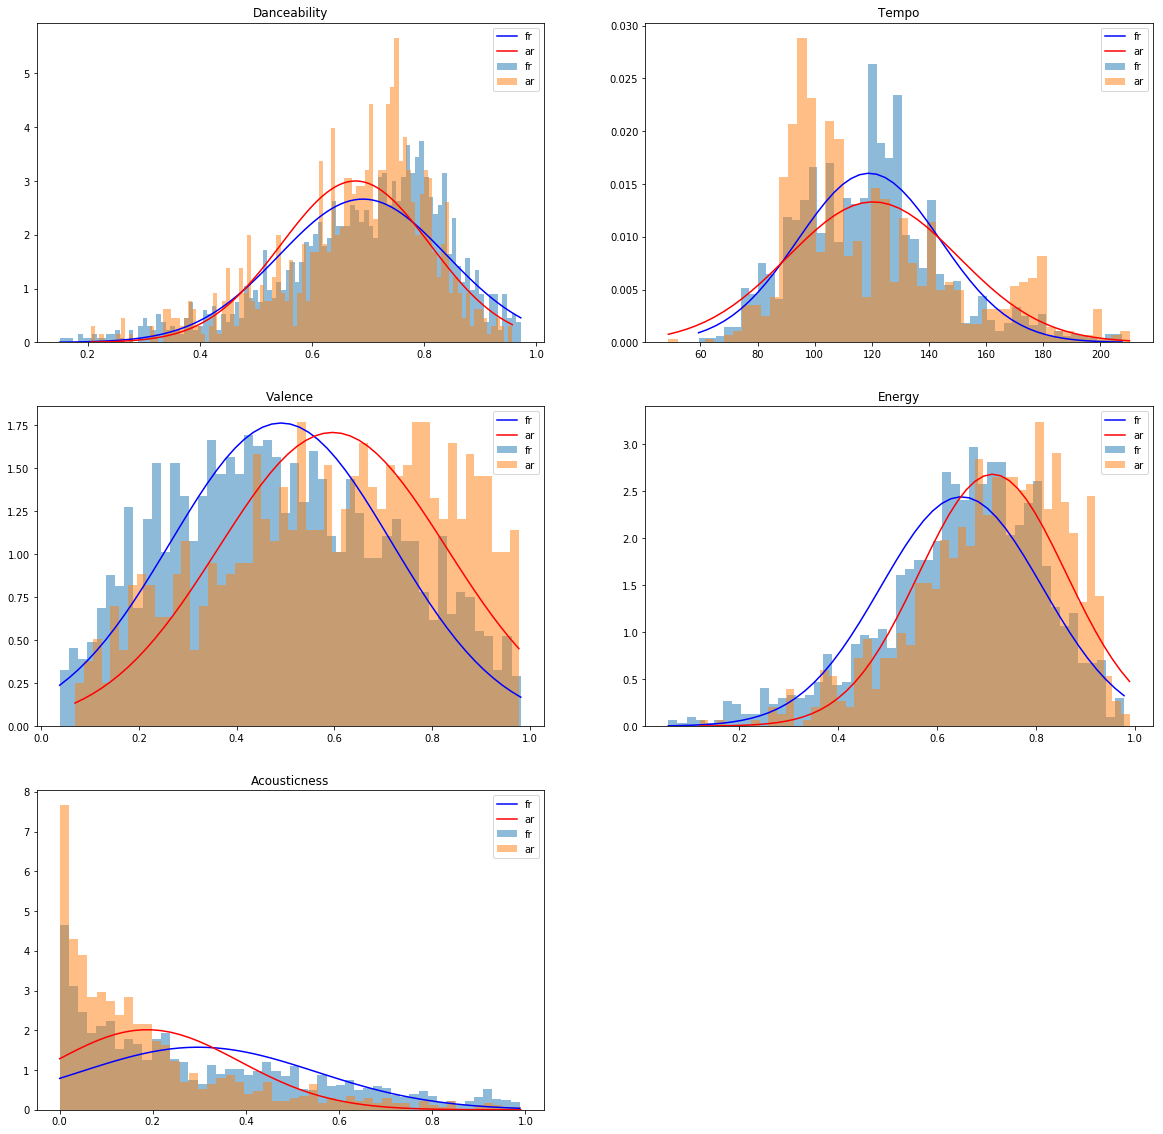

In [11]:
from scipy.stats import norm
import matplotlib.mlab as mlab

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(321)
mu0, sigma0 = norm.fit(tracks_fr.danceability)
mu1, sigma1 = norm.fit(tracks_ar.danceability)
_, bins0, _ = ax1.hist(tracks_fr.danceability,bins=100, label = 'fr', alpha=0.5, density=1)
_, bins1, _ = ax1.hist(tracks_ar.danceability,bins=100, label = 'ar', alpha=0.5, density=1)
y0 = mlab.normpdf(bins0, mu0, sigma0)
y1 = mlab.normpdf(bins1, mu1, sigma1)
ax1.plot(bins0,y0,'b',label='fr')
ax1.plot(bins1,y1,'r',label='ar')
ax1.legend(loc=1)
ax1.set_title('Danceability')

ax2= fig.add_subplot(322)
mu0, sigma0 = norm.fit(tracks_fr.tempo)
mu1, sigma1 = norm.fit(tracks_ar.tempo)
_, bins0, _ = ax2.hist(tracks_fr.tempo,bins=50, label = 'fr', alpha=0.5, density=1)
_, bins1, _ = ax2.hist(tracks_ar.tempo,bins=50, label = 'ar', alpha=0.5, density=1)
y0 = mlab.normpdf(bins0, mu0, sigma0)
y1 = mlab.normpdf(bins1, mu1, sigma1)
ax2.plot(bins0,y0,'b',label='fr')
ax2.plot(bins1,y1,'r',label='ar')
ax2.legend(loc=1)
ax2.set_title('Tempo')

ax3= fig.add_subplot(323)
mu0, sigma0 = norm.fit(tracks_fr.valence)
mu1, sigma1 = norm.fit(tracks_ar.valence)
_, bins0, _ = ax3.hist(tracks_fr.valence,bins=50, label = 'fr', alpha=0.5, density=1)
_, bins1, _ = ax3.hist(tracks_ar.valence,bins=50, label = 'ar', alpha=0.5, density=1)
y0 = mlab.normpdf(bins0, mu0, sigma0)
y1 = mlab.normpdf(bins1, mu1, sigma1)
ax3.plot(bins0,y0,'b',label='fr')
ax3.plot(bins1,y1,'r',label='ar')
ax3.legend(loc=1)
ax3.set_title('Valence')

ax4= fig.add_subplot(324)
mu0, sigma0 = norm.fit(tracks_fr.energy)
mu1, sigma1 = norm.fit(tracks_ar.energy)
_, bins0, _ = ax4.hist(tracks_fr.energy,bins=50, label = 'fr', alpha=0.5, density=1)
_, bins1, _ = ax4.hist(tracks_ar.energy,bins=50, label = 'ar', alpha=0.5, density=1)
y0 = mlab.normpdf(bins0, mu0, sigma0)
y1 = mlab.normpdf(bins1, mu1, sigma1)
ax4.plot(bins0,y0,'b',label='fr')
ax4.plot(bins1,y1,'r',label='ar')
ax4.legend(loc=1)
ax4.set_title('Energy')

ax5= fig.add_subplot(325)
mu0, sigma0 = norm.fit(tracks_fr.acousticness)
mu1, sigma1 = norm.fit(tracks_ar.acousticness)
_, bins0, _ = ax5.hist(tracks_fr.acousticness,bins=50, label = 'fr', alpha=0.5, density=1)
_, bins1, _ = ax5.hist(tracks_ar.acousticness,bins=50, label = 'ar', alpha=0.5, density=1)
y0 = mlab.normpdf(bins0, mu0, sigma0)
y1 = mlab.normpdf(bins1, mu1, sigma1)
ax5.plot(bins0,y0,'b',label='fr')
ax5.plot(bins1,y1,'r',label='ar')
ax5.legend(loc=1)
ax5.set_title('Acousticness')

plt.show()

First, from the `Danceability` and `Tempo` plot, we know that both countries love dancing music and tempo around 110-130 BPM (beats per minute), yet due to the high similarity of curves in both plots, its hard to use these two features to do classification. Next, look at the `Valence` and `Energy` plot, we can see the distribution of France lies on the left side of the plot, while Argentina lies on the right. From that we can say Argentine like songs with higher valence and energy than French does, valence indicating the positiveness of the song. Last, for the `Acousticness` plot, we can easily see the less acoustic the song is, the more Argentine is likely to enjoy the song, and for French, the trend is not that obvious but still slightly tilts toward less acousticness.

Here I'll show you how to get the popularity score of an artist and append this to the dataframe as a feature. 

In [13]:
# Artist_pop = []
# for x in tracks_ar.Artist:
#     try:
#         artist_info = sp.search(q='artist:' + x, type='artist',limit = 1)
#         Artist_pop.append(artist_info['artists']['items'][0]['popularity'])
#     except:
#         print(0)
#         Artist_pop.append(0)
#     sleep(0.00002)
# tracks_ar['Artist Popularity'] = Artist_pop
# tracks_ar['Artist Popularity'].replace(0,np.mean(tracks_ar['Artist Popularity']),inplace = True)  

# Artist_pop = []
# for x in tracks_fr.Artist:
#     try:
#         artist_info = sp.search(q='artist:' + x, type='artist',limit = 1)
#         Artist_pop.append(artist_info['artists']['items'][0]['popularity'])
#     except:
#         print(0)
#         Artist_pop.append(0)
#     sleep(0.00002)
# tracks_fr['Artist Popularity'] = Artist_pop
# tracks_fr['Artist Popularity'].replace(0,np.mean(tracks_fr['Artist Popularity']),inplace = True)  

# tracks_ar.to_csv('processed_ar.csv',index=False)
# tracks_fr.to_csv('processed_fr.csv',index=False)

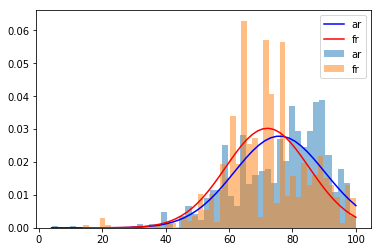

In [14]:
mu0, sigma0 = norm.fit(tracks_ar['Artist Popularity'])
mu1, sigma1 = norm.fit(tracks_fr['Artist Popularity'])
_,bins0,_ = plt.hist(tracks_ar['Artist Popularity'],bins=50, label = 'ar', alpha=0.5, density=1)
_,bins1,_ = plt.hist(tracks_fr['Artist Popularity'],bins=50, label = 'fr', alpha=0.5, density=1)
y0 = mlab.normpdf(bins0, mu0, sigma0)
y1 = mlab.normpdf(bins1, mu1, sigma1)
plt.plot(bins0,y0,'b',label='ar')
plt.plot(bins1,y1,'r',label='fr')
plt.legend(loc=1)
plt.show()

So, of course we can see that, since we work on top ranking data, the mean of popularity should be high, and from the above plot, we can say probably French doesn't care about the singers' popularity as much as Argentine does.

## Preprocessing

### Scale Data
Before you use your data, it's important to make sure your data is in the same range or same measurement, in order to avoid trivial features overriding important features due to its difference in scale. To do this, there are two ways: 

First is called `Normalization`<br>Normalization means scaling all parameters to between 0 and 1. In Scikit-Learn we can do it using `sklearn.preprocessing.MinMaxScaler`

Second is called `Standardization`<br>Standardization makes every column of features centered around mean of zero and a standard deviation of 1, also called Z-score normalization. In Scikit-Learn it's done in this way: `sklearn.preprocessing.scale('column name')` 

In [15]:
from sklearn import preprocessing
y_ar = tracks_ar['Label']
y_fr = tracks_fr['Label']
feature_ar = tracks_ar.drop(columns=['Position','Track Name','Artist','Streams','URL','Date','Region','Label'])
feature_fr = tracks_fr.drop(columns=['Position','Track Name','Artist','Streams','URL','Date','Region','Label'])
y = pd.concat([y_ar,y_fr],ignore_index=True)
X = pd.concat([feature_ar,feature_fr],ignore_index=True)
# Normalize Data
cols = (X['danceability'],X['energy'],X['speechiness'],X['tempo'],X['valence'],X['acousticness'],X['Artist Popularity'])
for col in cols:
    preprocessing.scale(col,copy=False)

### Split Data into training set and testing set
To test the performance of the classifiers, we split the data into training and test set, and then tune the hyperparameters to get the best result with cross validations in training data, and test the parameters on test set to see how well they generalize to unseen data.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

## Build Machine Learning Models
- In machine learning tasks, the last thing we want is our model not generalizing to unseen data, and instead it remembers noise and specific characteristics in training sets. Therefore, we have to validate our model and one way to approach this is by using cross validation. The method we'll use here is called `K-fold Cross-Validation`. (A lot of validation method can be found [here](https://en.wikipedia.org/wiki/Cross-validation_(statistics)))

### Import GridSearchCV
Here, you'll learn how to easily test different sets of parameters and see how each set of parameters perform and the which set performs the best. The method we use is `GridSearchCV` and its usage is as below.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{'kernel':['linear'],'C':[1,10,100]},
              {'kernel':['rbf'],'gamma':[0.1,0.01,1e-3,1e-4]}
             ]
clf = GridSearchCV(SVC(),parameters,cv=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [18]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

0.698 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.696 (+/-0.043) for {'C': 10, 'kernel': 'linear'}
0.696 (+/-0.042) for {'C': 100, 'kernel': 'linear'}
0.725 (+/-0.037) for {'gamma': 0.1, 'kernel': 'rbf'}
0.705 (+/-0.043) for {'gamma': 0.01, 'kernel': 'rbf'}
0.647 (+/-0.001) for {'gamma': 0.001, 'kernel': 'rbf'}
0.647 (+/-0.001) for {'gamma': 0.0001, 'kernel': 'rbf'}


##### Best set of parameters

In [19]:
clf.best_params_

{'gamma': 0.1, 'kernel': 'rbf'}

##### Use classification_report to see how well it classifies each class

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.77      0.87      0.82       495
          1       0.66      0.50      0.57       254

avg / total       0.73      0.74      0.73       749



In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[429,  66],
       [126, 128]], dtype=int64)

From the classification report and confusion matrix, we can see that the classification tells class 0 better than class 1.<br>
One possible reason is because the number of class 0 data is twice the number of class 1, which means this data is imbalanced. The way I'll deal with this is to use [SMOTE(Synthetic Minority Over-sampling Technique)](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html) to generate synthetic data for class 1.

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X, y)
X_sm = pd.DataFrame(X_sm)
X_sm.columns = X.columns

##### Visualize the data distribution after generating synthetic class 1 data
columns: ('acousticness','Artist Popularity','valence')

<IPython.core.display.Javascript object>


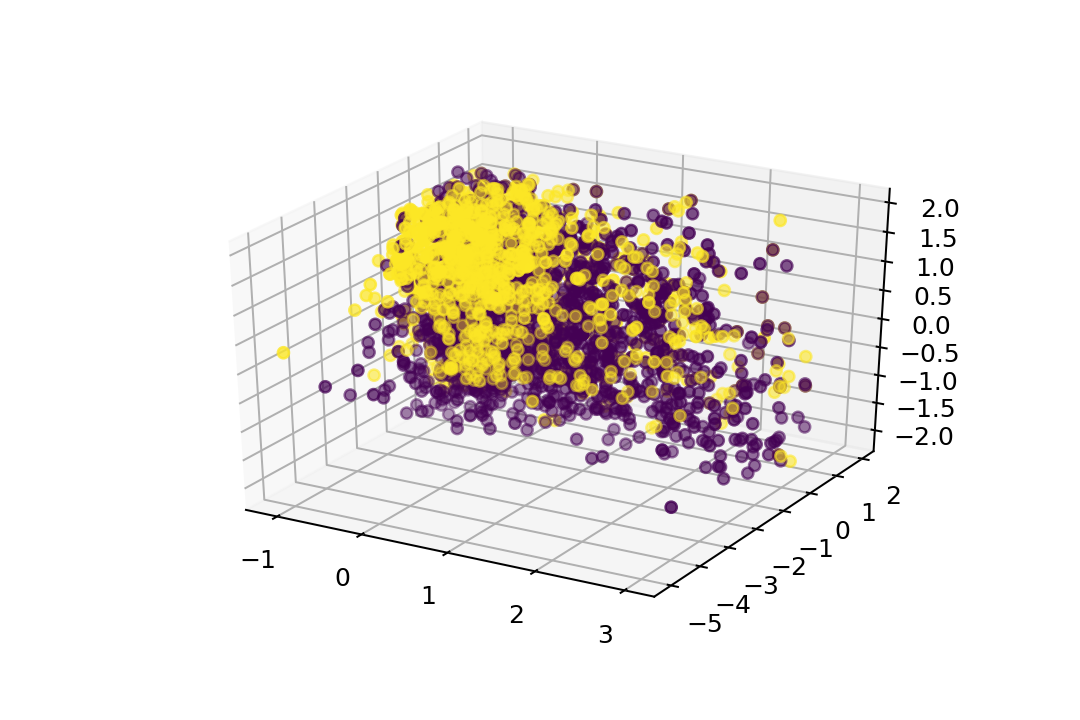

In [23]:
%matplotlib notebook
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_sm['acousticness'],X_sm['Artist Popularity'],X_sm['valence'],c=y_sm)
plt.show()

#### Principal Component Analysis
Principle Component Analysis(PCA) helps reduce dimensionality by highlighting significant features and suppressing low importance features. Let's see how our data will be distributed in the 3D space in PCA(Only the first three column of PCA-transformed data).

<IPython.core.display.Javascript object>


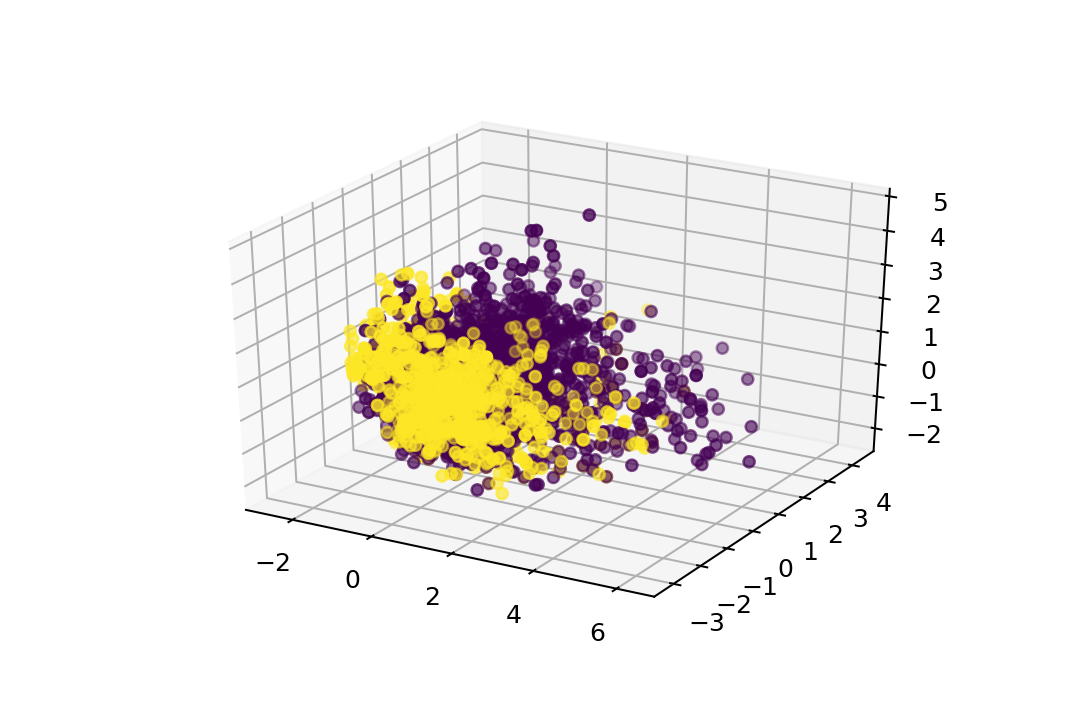

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_sm)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y_sm)
plt.show()

### Deal with synthesized data
#### - Support Vector Machine (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=2)

In [26]:
parameters = [{'kernel':['linear'],'C':[1,10,100]},
              {'kernel':['rbf'],'gamma':[0.1,0.01,1e-3,1e-4]}
             ]
clf = GridSearchCV(SVC(),parameters,cv=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [27]:
print('Best set of parameters:')
print(clf.best_params_)
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

Best set of parameters:
{'gamma': 0.1, 'kernel': 'rbf'}

0.701 (+/-0.025) for {'C': 1, 'kernel': 'linear'}
0.702 (+/-0.026) for {'C': 10, 'kernel': 'linear'}
0.701 (+/-0.024) for {'C': 100, 'kernel': 'linear'}
0.734 (+/-0.028) for {'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.026) for {'gamma': 0.01, 'kernel': 'rbf'}
0.694 (+/-0.021) for {'gamma': 0.001, 'kernel': 'rbf'}
0.505 (+/-0.003) for {'gamma': 0.0001, 'kernel': 'rbf'}



In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.69      0.75       494
          1       0.73      0.86      0.79       481

avg / total       0.78      0.77      0.77       975



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[341, 153],
       [ 69, 412]], dtype=int64)

#### - Random Forest Classifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

- Plot score vs max_depth to see how max_depth affects accuracy

<IPython.core.display.Javascript object>


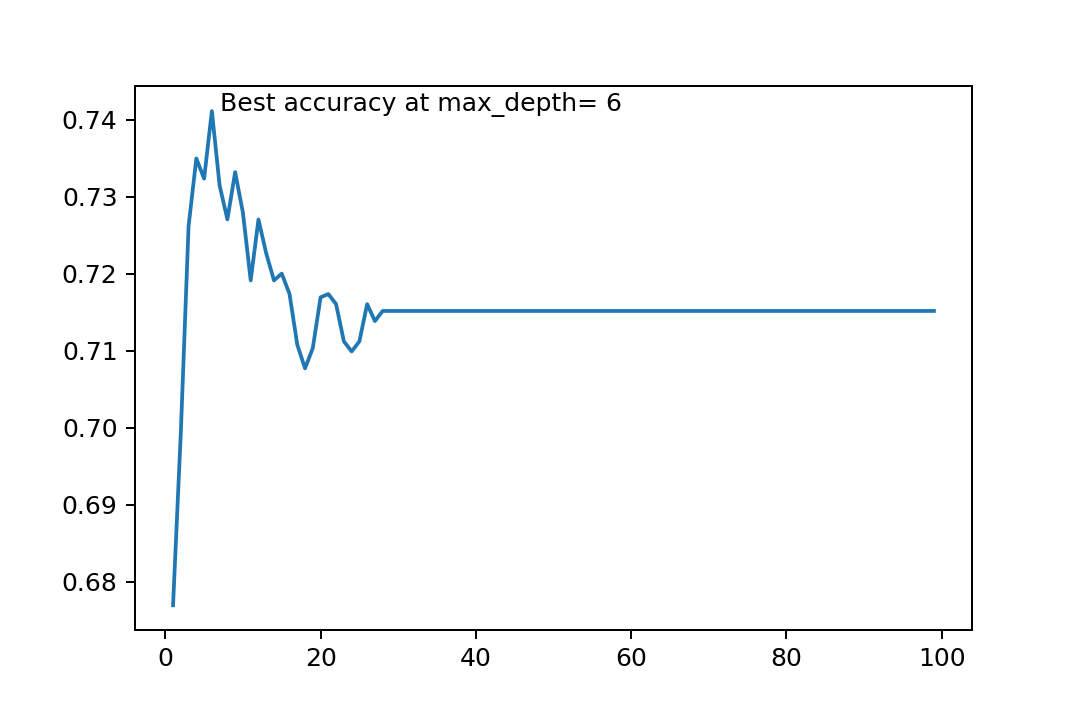

In [48]:
scores = []
for i in range(1,100):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    scores.append(cross_val_score(clf,X_train,y_train,cv=5).mean())
fig = plt.figure()
plt.plot(range(1,100),scores)
plt.text(np.argmax(scores)+2,max(scores),'Best accuracy at max_depth= %s'%(np.argmax(scores)+1))
plt.show()

- Plot score vs n_estimators to see how number of trees affects accuracy

<IPython.core.display.Javascript object>


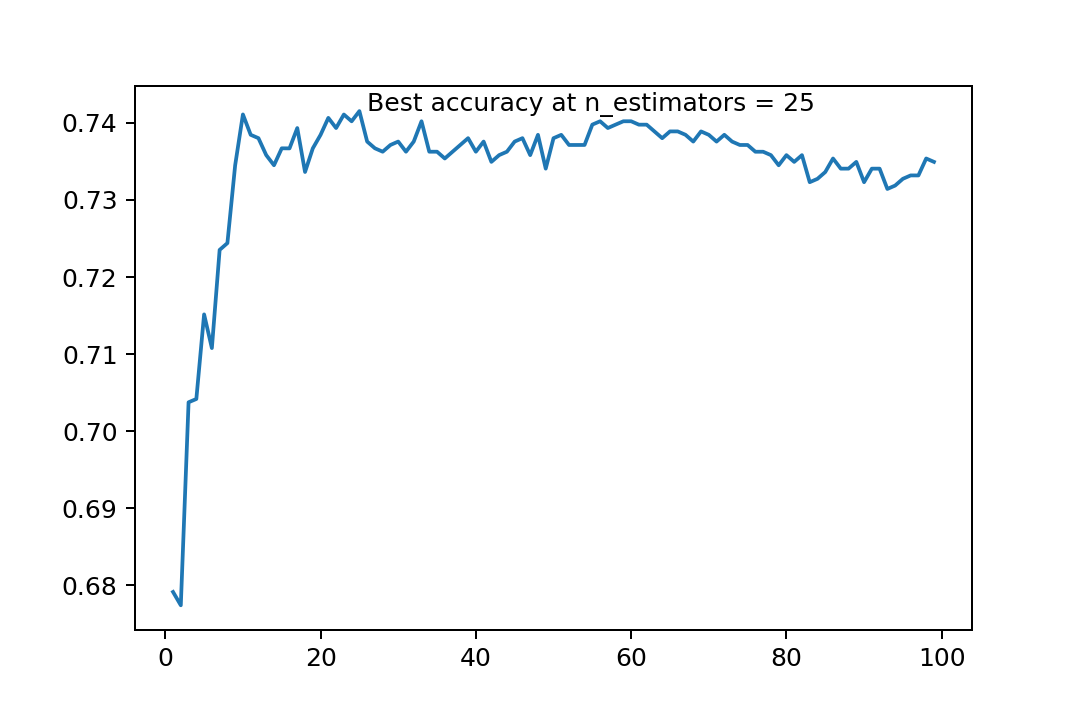

In [49]:
scores = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators=i,max_depth=6, random_state=0)
    scores.append(cross_val_score(clf,X_train,y_train,cv=5).mean())
fig = plt.figure()
plt.plot(range(1,100),scores)
plt.text(np.argmax(scores)+2,max(scores),'Best accuracy at n_estimators = %s'%(np.argmax(scores)+1))
plt.show()

Use the best parameters from above to predict test cases.

In [70]:
clf = RandomForestClassifier(n_estimators=25,max_depth=6,random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.72      0.76       494
          1       0.74      0.82      0.78       481

avg / total       0.77      0.77      0.77       975



#### - K-NearestNeibor (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

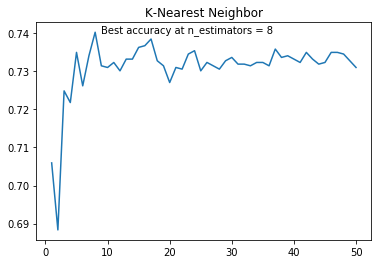

In [57]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier as KNN
scores = []
for i in range(1,51):
    knn = KNN(n_neighbors=i)
    scores.append(cross_val_score(knn,X_train,y_train,cv=5).mean())
plt.figure()
plt.title('K-Nearest Neighbor')
plt.plot(range(1,51),scores)
plt.text(np.argmax(scores)+2,max(scores),'Best accuracy at n_estimators = %s'%(np.argmax(scores)+1))
plt.show()

In [59]:
clf = KNN(n_neighbors=8)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.72      0.74      0.73       481
          1       0.74      0.72      0.73       494

avg / total       0.73      0.73      0.73       975



#### - AdaBoost Classifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
parameters = [{'n_estimators':[100,200,300],'learning_rate':[0.01,0.1,0.5]}]
clf = GridSearchCV(AdaBoostClassifier(),parameters,cv=5)
y_pred = clf.fit(X_train,y_train).predict(X_test)
print('Best set of parameters:')
print(clf.best_params_)
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

Best set of parameters:
{'learning_rate': 0.1, 'n_estimators': 100}

0.679 (+/-0.025) for {'learning_rate': 0.01, 'n_estimators': 100}
0.676 (+/-0.035) for {'learning_rate': 0.01, 'n_estimators': 200}
0.697 (+/-0.041) for {'learning_rate': 0.01, 'n_estimators': 300}
0.713 (+/-0.035) for {'learning_rate': 0.1, 'n_estimators': 100}
0.712 (+/-0.030) for {'learning_rate': 0.1, 'n_estimators': 200}
0.712 (+/-0.042) for {'learning_rate': 0.1, 'n_estimators': 300}
0.713 (+/-0.023) for {'learning_rate': 0.5, 'n_estimators': 100}
0.707 (+/-0.028) for {'learning_rate': 0.5, 'n_estimators': 200}
0.708 (+/-0.019) for {'learning_rate': 0.5, 'n_estimators': 300}
